In [1]:
from collections import Counter
import gc
from itertools import product
import numpy as np
import pandas as pd
import pickle
import random
import ray
import re
from scipy import spatial
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
with open("results/answers.txt", "r") as f:
    answers = f.read().split("\n")

with open("results/other_words.txt", "r") as f:
    other_words = f.read().split("\n")

for answer in ["agora", "pupal", "lynch", "harry", "fibre", "slave", "hasty", "fella"]: # NYTimes version skipped these
    answers.remove(answer)
    
# NYTimes version replaced these
answers[324] = "shiny"
answers[325] = "gecko"

accepted_words_list = answers + other_words


In [3]:
# Create a letter occurrence dictionary 
words_string = ''.join(accepted_words_list)
letter_counts = dict(Counter(words_string))
# Create letter frequency dictionary
letter_frequencies = {k:v/len(accepted_words_list) for k,v in letter_counts.items()}
# Create letter frequency DataFrame
letter_frequencies = pd.DataFrame({'Letter':list(letter_frequencies.keys()),                      'Frequency':list(letter_frequencies.values())}).sort_values('Frequency',                                                                                  ascending=False)
#letter_frequencies

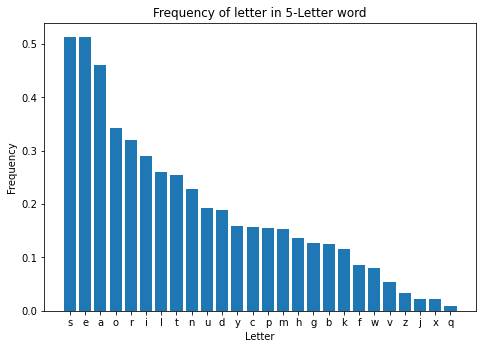

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
##langs = ['C', 'C++', 'Java', 'Python', 'PHP']
##students = [23,17,35,29,12]
ax.bar(letter_frequencies.Letter,letter_frequencies.Frequency)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of letter in 5-Letter word')
ax.set_xlabel('Letter')
plt.show()

In [5]:
df = pd.read_csv("unigram_freq.csv")
# Establish a minimum frequency for any Wordle word that's missing from the frequency dataset
min_freq = min(df["count"])
english_freqs = {df["word"][i]: df["count"][i] for i in df.index}
freqs = {w: min_freq if w not in english_freqs else english_freqs[w] for w in accepted_words_list}
#freqs

In [ ]:
#Generating wordcloud. Relative scaling value is to adjust the importance of a frequency word.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=10000,height=9000, max_words=10000,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freqs)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df = pd.read_csv("updated/tweets.csv")
df

In [ ]:
def wordle_guesses(tweet):
    text = (tweet.replace("Y", "y").replace("🟩", "Y")
                 .replace("M", "m").replace("🟨", "M")
                 .replace("N", "n").replace("⬛", "N").replace("⬜", "N"))
    guesses = re.findall("([YMN]+)", text)
    return guesses
def checkKey(dict, key):
      
    if key in dict.keys():
        return True
    else:
        return False
        
tweet_texts = df["tweet_text"]
games = [wordle_guesses(tweet) for tweet in tweet_texts] 
total_games = len(games)
successful_games_per_round = dict()
successful_games_per_round[-1] = 0
for game in games:
    if(len(game) > 6):
        successful_games_per_round[-1] = successful_games_per_round[-1] + 1
    else:
        if (checkKey(successful_games_per_round,len(game)) == False):
            successful_games_per_round[len(game)] = 0
        successful_games_per_round[len(game)] = successful_games_per_round[len(game)] + 1
        

successful_fractions_per_round = letter_frequencies = pd.DataFrame({'Round':list(successful_games_per_round.keys()),
                                                                    'Fraction':[x / total_games for x in list(successful_games_per_round.values())]}).sort_values('Fraction', ascending=False)
#successful_fractions_per_round

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
##langs = ['C', 'C++', 'Java', 'Python', 'PHP']
##students = [23,17,35,29,12]
ax.bar(successful_fractions_per_round.Round,successful_fractions_per_round.Fraction)
ax.set_ylabel('Fraction')
ax.set_title('Frequency of letter in 5-Letter word')
ax.set_xlabel('Round')
plt.show()